# Renaming Trick


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

This reads in our well data like normal

In [4]:
df=pd.read_csv('well_data.csv')

### To do list
- Open the r2 excel file you made in class.  I called it r2_class_example.xlsx
- add a new column.  Call it something like new_name.  Give it new names.
- Save the file to a new name so it can't get over written.  I called it r2_class_example_new_names.xlsx
- read it in and call it something useful
- set the index column to name.



In [7]:
df_name=pd.read_excel('r2_class_example_new_names.xlsx',index_col='name')

In [18]:
df_name

Unnamed: 0        r2                                new_name
name                                                              
Sr            11  0.155595                        Stronitum (pp=b)
Ca             3  0.154148                           Calcium (ppb)
P              1  0.069488                      Phosphourous (ppm)
Fe             4  0.065557                         Fe (mgL$^{-1}$)
Ba             5  0.059968                                     ppm
Na             6  0.053342                        Sodium is boring
Si             0  0.037977                                Si (ppb)
Mn             9  0.032770                           I hate units!
SO4           14  0.021915                                     ppm
Br            15  0.018130                                     ppm
S              2  0.014789  Sulfur $\left(\frac{\mu g}{L} \right)$
Cl            13  0.009093                                     ppb
Mg             7  0.000824                                     ppm
K              8  0.000090                         something else?
F             12  0.000030                                     ppm

Here is what we can do.  
- We can pass the element name into df_name and try to get out the new name.
- below is my bad schematic of using a dataframe as a converter.
- We do this by asking for the new_name column and passing in the index.  
- There are a couple ways to do this.

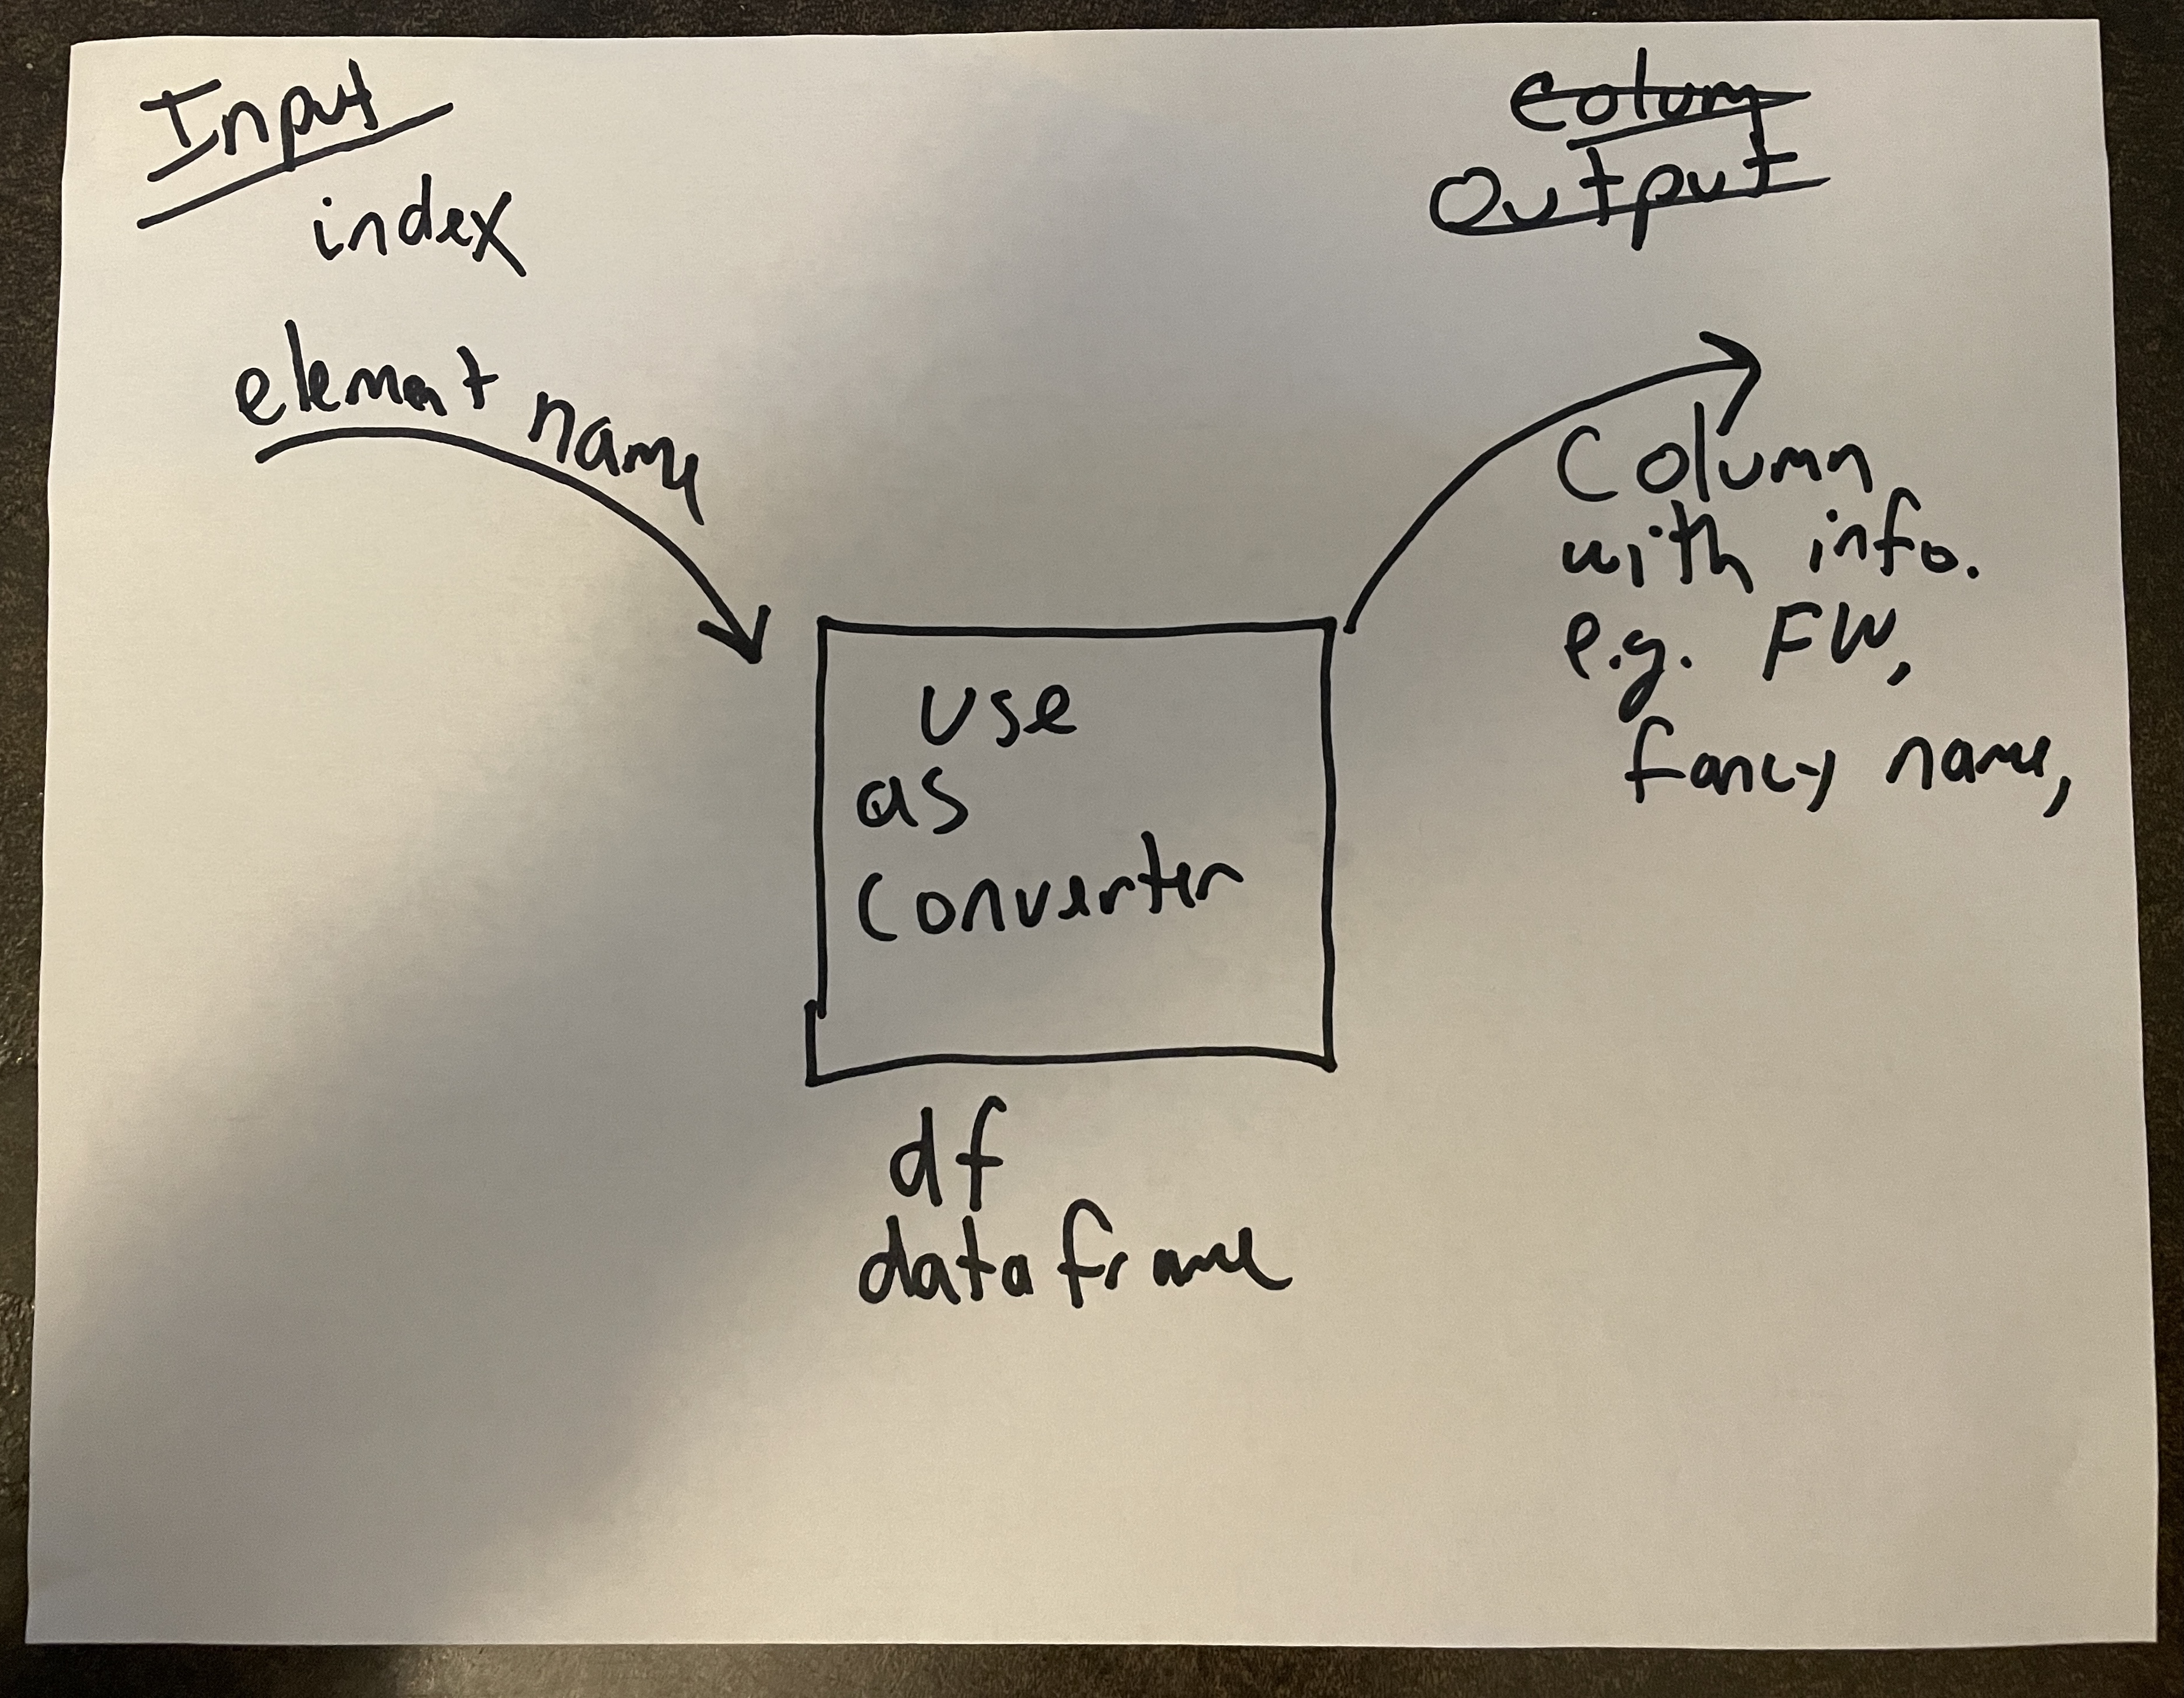

In [26]:
from IPython.display import Image
Image(filename='converter.jpg',width=300)

In [14]:
el='Fe'

df_name['new_name'][el]


'Fe (mgL$^{-1}$)'

In [16]:
el='Fe'
df_name.loc[el]['new_name']

'Fe (mgL$^{-1}$)'

Now change el to a different element.

In [19]:
el='Ca'
df_name.loc[el]['new_name']

'Calcium (ppb)'

Now this is confusing.
- loop over the columns in df
- check if the column name is in the index of df_name
- if yes print the old and new name

In [23]:
for col in df:
    if col in df_name.index:
        print('The original column name is {} and now I can convert it to {}'\
              .format(col,df_name.loc[col]['new_name']))
    else:
        print('not in index')

not in index
not in index
not in index
not in index
not in index
The original column name is Si and now I can convert it to Si (ppb)
The original column name is P and now I can convert it to Phosphourous (ppm)
The original column name is S and now I can convert it to Sulfur $\left(\frac{\mu g}{L} \right)$
The original column name is Ca and now I can convert it to Calcium (ppb)
The original column name is Fe and now I can convert it to Fe (mgL$^{-1}$)
The original column name is Ba and now I can convert it to ppm
The original column name is Na and now I can convert it to Sodium is boring
The original column name is Mg and now I can convert it to ppm
The original column name is K and now I can convert it to something else?
The original column name is Mn and now I can convert it to I hate units!
not in index
The original column name is Sr and now I can convert it to Stronitum (pp=b)
The original column name is F and now I can convert it to ppm
The original column name is Cl and now I can 

Now here I am going to use the trick to change an axis name

Fe


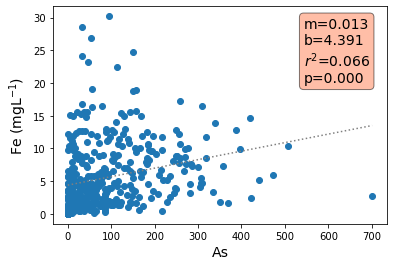

In [25]:
fig,ax=plt.subplots()

x='As'
y='Fe'

props=dict(boxstyle='round',facecolor='coral',alpha=0.5)
print (y)

if df[y].dtype==float:
    ax.scatter(df[x],df[y])
    ax.set_xlabel(x,fontsize=14)
    ax.set_ylabel(df_name.loc[y]['new_name'],fontsize=14)
   
    results=stats.linregress(df[[x,y]].dropna())
    
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.3f}\np={:.3f}'.\
                    format(results.slope,results.intercept\
                          ,results.rvalue**2,results.pvalue)
    
    x_fit=np.array([df[x].min(),df[x].max()])
    ax.plot(x_fit,results.slope*x_fit+results.intercept,color='gray',linestyle='dotted')
    
    ax.text(0.75,0.95,textstr,transform=ax.transAxes,fontsize=14\
            ,verticalalignment='top',bbox=props)

